In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv("../Detzel/data/raw/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1244 non-null   int64  
 1   sex       1244 non-null   object 
 2   bmi       1244 non-null   float64
 3   children  1244 non-null   int64  
 4   smoker    1244 non-null   object 
 5   region    1244 non-null   object 
 6   charges   1244 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 68.2+ KB


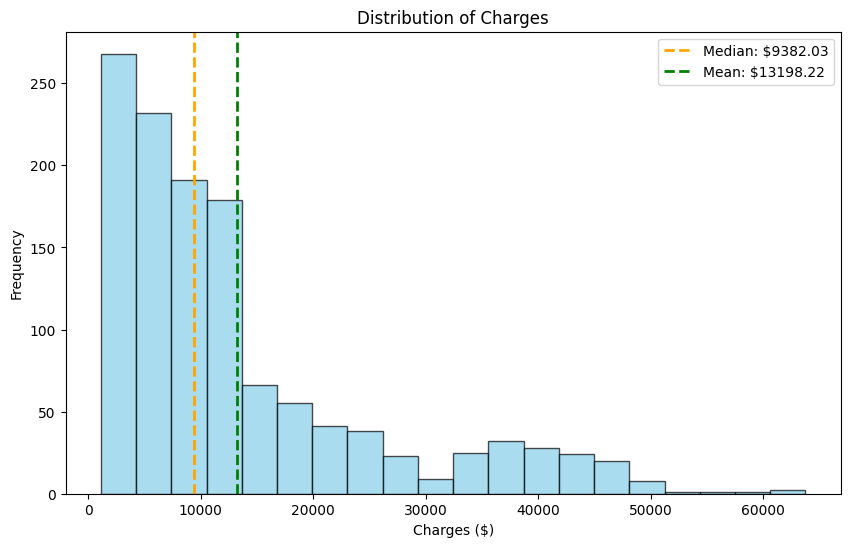

In [8]:
# Вычисление медианы и среднего значения charges
median_charges = df['charges'].median()
mean_charges = df['charges'].mean()

# Построение графика
plt.figure(figsize=(10, 6))

# Гистограмма расходов
plt.hist(df['charges'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

# Вертикальная линия для медианы
plt.axvline(median_charges, color='orange', linestyle='dashed', linewidth=2, label=f'Median: ${median_charges:.2f}')

# Вертикальная линия для среднего значения
plt.axvline(mean_charges, color='green', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_charges:.2f}')

# Отображение легенды
plt.legend()

plt.show()

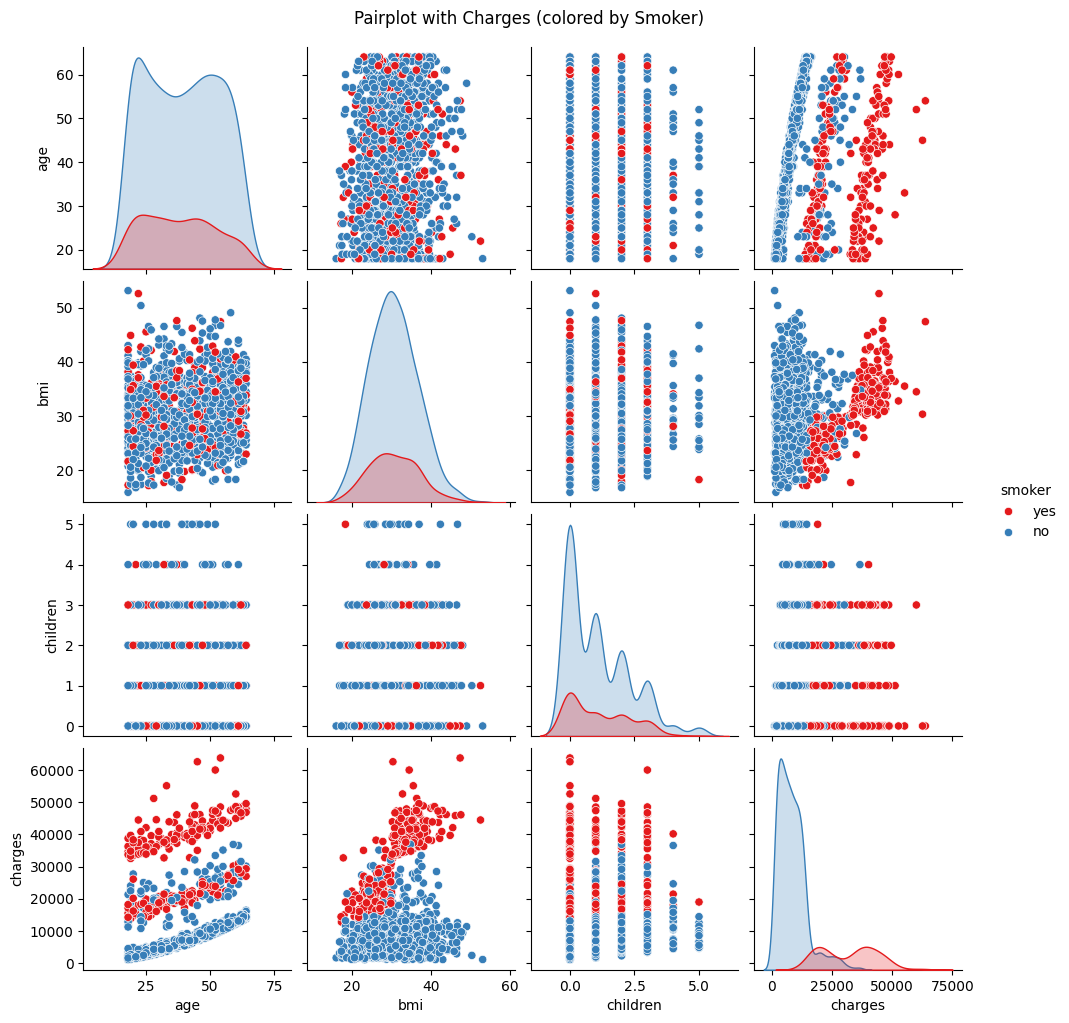

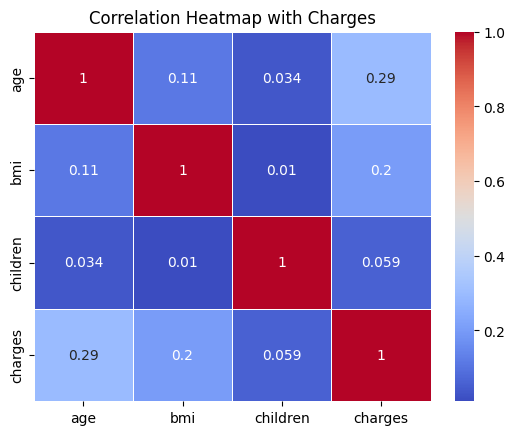

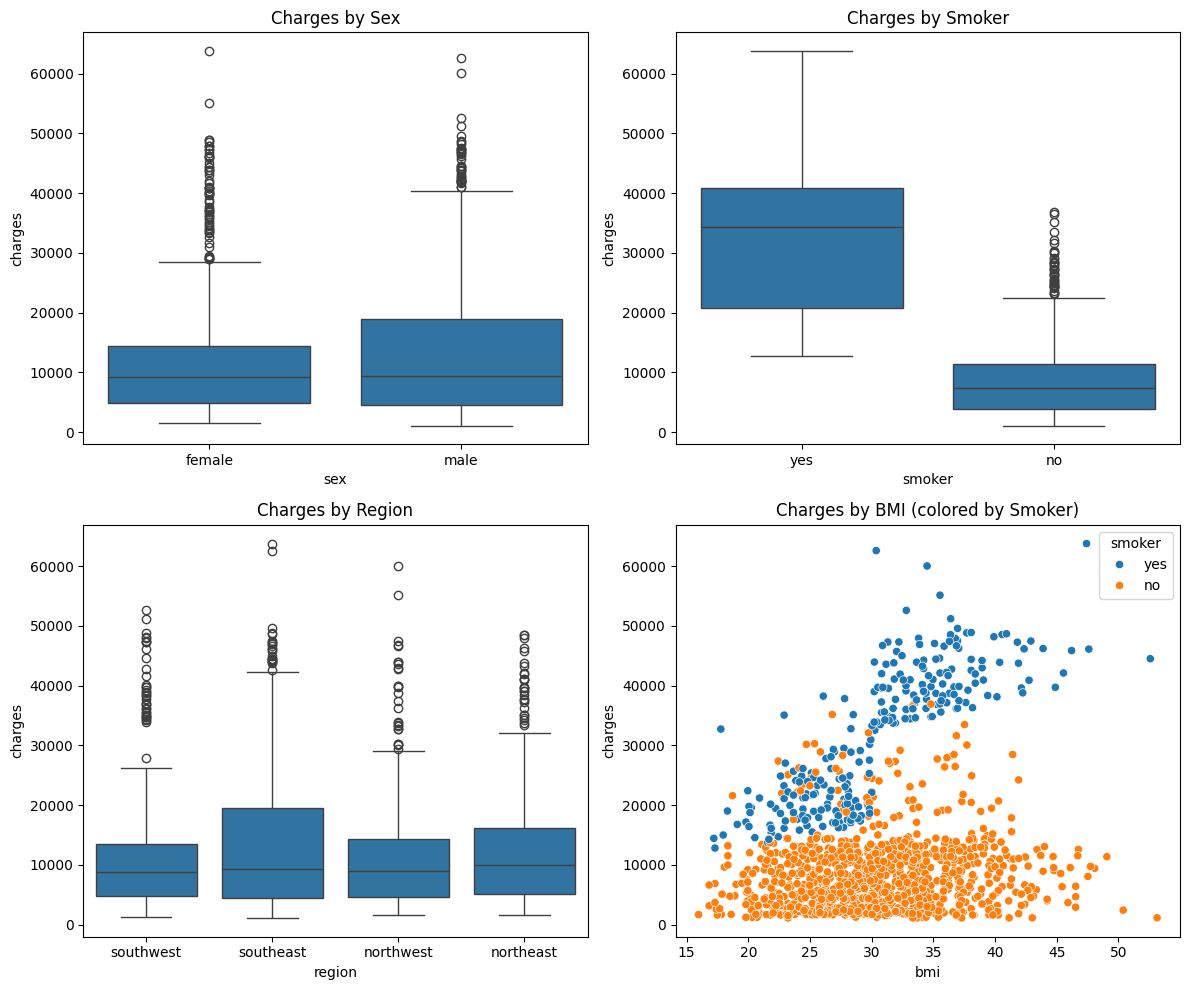

In [13]:
# Построим матрицу диаграмм рассеяния (Pairplot) с учетом целевого признака 'charges'
sns.pairplot(df, kind='scatter', diag_kind='kde', hue='smoker', palette='Set1', vars=['age', 'bmi', 'children', 'charges'])
plt.suptitle("Pairplot with Charges (colored by Smoker)", y=1.02)
plt.show()

# Построим тепловую карту корреляций числовых признаков, включая целевой признак 'charges'
corr_with_charges = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(corr_with_charges, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap with Charges")
plt.show()

# Построим графики зависимости целевого признака 'charges' от категориальных признаков
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='sex', y='charges', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Charges by Sex')

sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Charges by Smoker')

sns.boxplot(x='region', y='charges', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Charges by Region')

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Charges by BMI (colored by Smoker)')

plt.tight_layout()
plt.show()

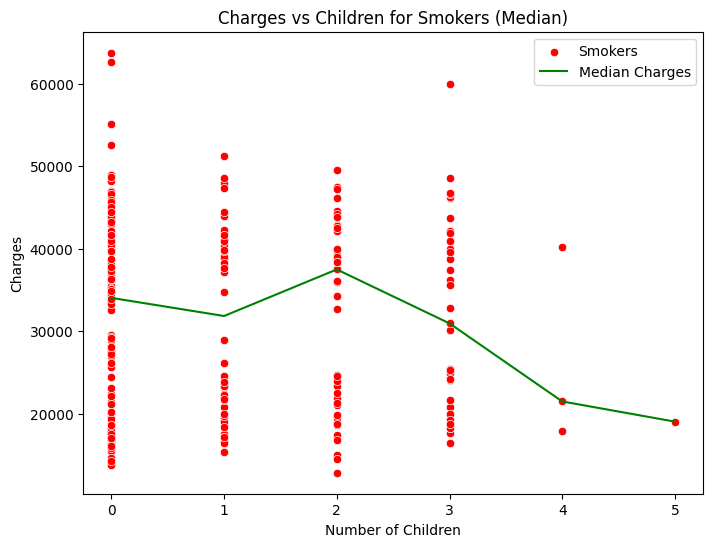

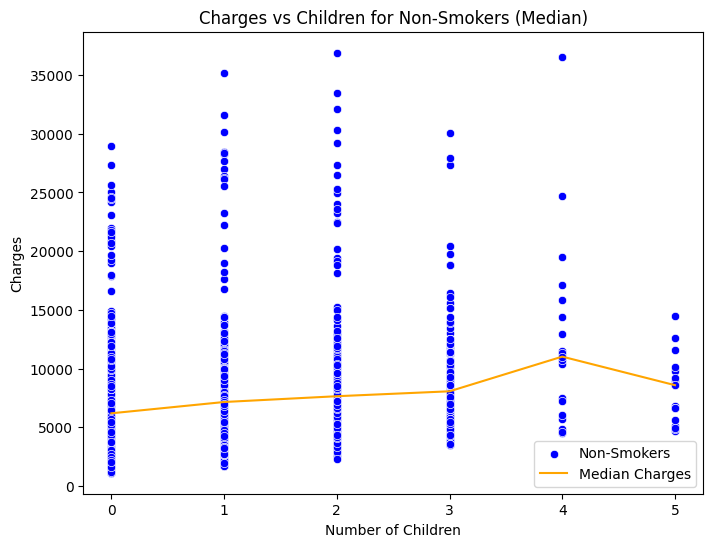

In [17]:
# Отфильтруем данные для курящих и некурящих людей
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

# Создадим DataFrame со всеми возможными значениями количества детей (от 0 до максимального значения в данных)
max_children = df['children'].max()
all_children = pd.DataFrame({'children': range(max_children + 1)})

# Рассчитаем медиану затрат для каждого количества детей у курящих и у некурящих
smoker_median_charges = smokers.groupby('children')['charges'].median().reset_index()
non_smoker_median_charges = non_smokers.groupby('children')['charges'].median().reset_index()

# Объединим данные с полным списком количества детей
smoker_median_charges = all_children.merge(smoker_median_charges, on='children', how='left')
non_smoker_median_charges = all_children.merge(non_smoker_median_charges, on='children', how='left')

# Построим графики зависимости затрат от количества детей для курящих с указанием медианы
plt.figure(figsize=(8, 6))
sns.scatterplot(x='children', y='charges', data=smokers, color='red', label='Smokers')
sns.lineplot(x='children', y='charges', data=smoker_median_charges, color='green', label='Median Charges')
plt.title('Charges vs Children for Smokers (Median)')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Построим графики зависимости затрат от количества детей для некурящих с указанием медианы
plt.figure(figsize=(8, 6))
sns.scatterplot(x='children', y='charges', data=non_smokers, color='blue', label='Non-Smokers')
sns.lineplot(x='children', y='charges', data=non_smoker_median_charges, color='orange', label='Median Charges')
plt.title('Charges vs Children for Non-Smokers (Median)')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.legend()
plt.show()
